In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [3]:
data_iris = datasets.load_iris()

In [4]:
#Obteniendo los datos del set
caracteristicas = data_iris.data[:100, :2]
print(caracteristicas.shape)

(100, 2)


In [5]:
#Obteniendo las etiquetas del set
etiquetas = data_iris.target[:100]
print(etiquetas.shape)

(100,)


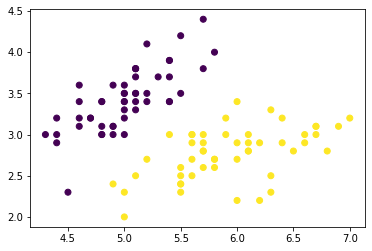

In [6]:
plt.scatter(caracteristicas[:, 0], caracteristicas[:, 1], c=etiquetas)
plt.show()

In [7]:
# se recomienda hacer un preprocesado de datos para normalizarlos antes de entrenar
# Se usa un scaler para normalizar los datos
scaler = StandardScaler()

# se aplica el preprocesado a los datos
caracteristicas_normalizadas = scaler.fit_transform(caracteristicas) #fit en sickit learn es que se le van a pasar datos para que se entrene

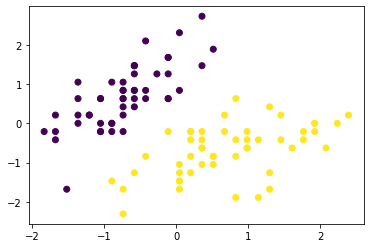

In [8]:
#Graficando las caracteristicas normalizadas
plt.scatter(caracteristicas_normalizadas[:, 0], caracteristicas_normalizadas[:, 1], c=etiquetas)
plt.show()

In [9]:
#Obtener los datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(caracteristicas_normalizadas, etiquetas, test_size=0.2, random_state=0)

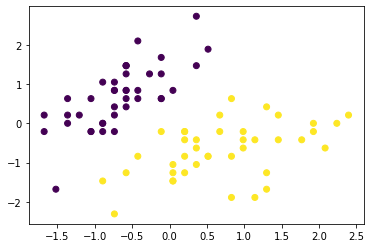

In [10]:
# graficar los datos de entrenamiento
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

In [11]:
svc = SVC(kernel='linear', C=1) # clasificador lineal de SVC con C=1
#Entrenar el clasificador
svc.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [12]:
#probando el modelo con los datos de prueba
y_pred = svc.predict(X_test)

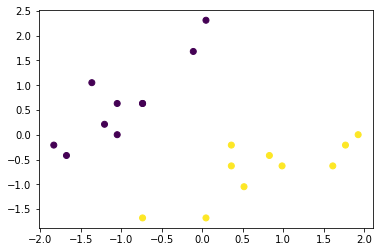

In [13]:
#Graficando los datos de prueba
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)

In [14]:
#Obteniendo las metricas del modelo
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [15]:
#obteniendo la matriz de confusion
print(metrics.confusion_matrix(y_test, y_pred))

[[10  0]
 [ 0 10]]


In [16]:
#Graficando los vectores de soporte
def plot_svc_decision_function(model, ax = None, plot_support = True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.show()

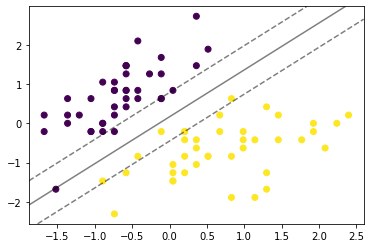

In [17]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plot_svc_decision_function(svc)